In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("../Datasets/df_kulik_and_rdkit.parquet")

In [4]:
df.dtypes

cid                    int64
atomic_radii_lvl0    float64
atomic_radii_lvl1    float64
atomic_radii_lvl2    float64
atomic_radii_lvl3    float64
                      ...   
TD_OS_07             float64
TD_ET_08             float64
TD_OS_08             float64
TD_ET_09             float64
TD_OS_09             float64
Length: 96, dtype: object

In [5]:
df.shape

(3332473, 96)

In [6]:
df.columns

Index(['cid', 'atomic_radii_lvl0', 'atomic_radii_lvl1', 'atomic_radii_lvl2',
       'atomic_radii_lvl3', 'van_der_waals_radii_lvl0',
       'van_der_waals_radii_lvl1', 'van_der_waals_radii_lvl2',
       'van_der_waals_radii_lvl3', 'covalent_radii_lvl0',
       'covalent_radii_lvl1', 'covalent_radii_lvl2', 'covalent_radii_lvl3',
       'valence_e_lvl0', 'valence_e_lvl1', 'valence_e_lvl2', 'valence_e_lvl3',
       '1st_ionization_energy_lvl0', '1st_ionization_energy_lvl1',
       '1st_ionization_energy_lvl2', '1st_ionization_energy_lvl3',
       'electronegativity_lvl0', 'electronegativity_lvl1',
       'electronegativity_lvl2', 'electronegativity_lvl3', 'exactmw', 'amw',
       'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA',
       'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms', 'NumAmideBonds',
       'FractionCSP3', 'NumRings', 'NumAromaticRings', 'NumAliphaticRings',
       'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHe

<Axes: >

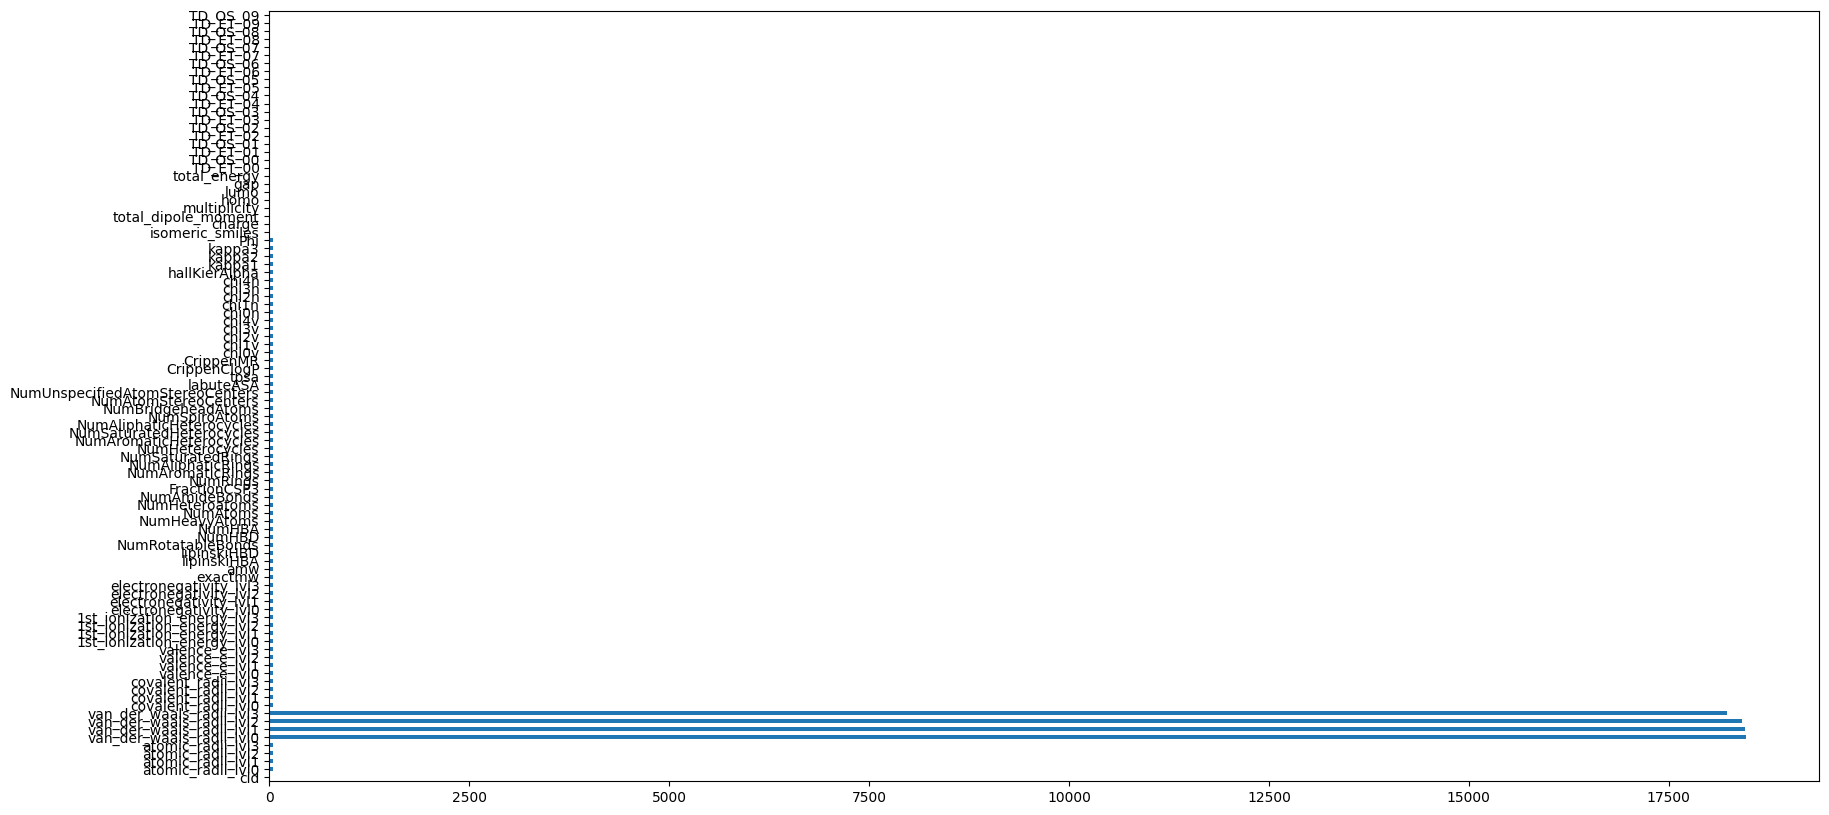

In [8]:
#checking on null values
df.isnull().sum().plot.barh(figsize=(20,10))

In [9]:
df[df.isna().any(axis=1)]

,cid,atomic_radii_lvl0,atomic_radii_lvl1,atomic_radii_lvl2,atomic_radii_lvl3,van_der_waals_radii_lvl0,van_der_waals_radii_lvl1,van_der_waals_radii_lvl2,van_der_waals_radii_lvl3,covalent_radii_lvl0,...,TD_ET_05,TD_OS_05,TD_ET_06,TD_OS_06,TD_ET_07,TD_OS_07,TD_ET_08,TD_OS_08,TD_ET_09,TD_OS_09
979,1261,124000.0,151775.0,217325.0,249350.0,NaN,NaN,NaN,NaN,165779.0,...,39966.780277,0.004356,41756.129344,0.010259,41963.373504,0.000974,42336.921123,0.002592,43674.793282,0.121343
1080,1402,168100.0,210575.0,314825.0,372550.0,NaN,NaN,NaN,NaN,225895.0,...,39721.982943,0.003078,39982.693596,0.015391,40864.314046,0.063527,40934.347167,0.001565,41835.381382,0.000762
1147,1473,68225.0,83700.0,118675.0,130750.0,NaN,NaN,NaN,NaN,96228.0,...,35269.858953,0.008900,35862.611934,0.000363,35977.707251,0.083423,36526.809507,0.000021,39011.416556,0.009078
1224,1598,93650.0,117200.0,164225.0,176750.0,NaN,NaN,NaN,NaN,123788.0,...,44109.380939,0.004414,44988.355890,0.000848,45423.612988,0.015050,45549.475807,0.011604,47054.812862,0.001303
1282,1677,59000.0,67900.0,92650.0,98550.0,NaN,NaN,NaN,NaN,77903.0,...,45298.169578,0.000658,46026.060753,0.010395,47658.526917,0.047114,48216.598058,0.000990,49010.917056,0.309986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331965,75250869,97350.0,126400.0,194550.0,241750.0,NaN,NaN,NaN,NaN,135888.0,...,53403.525394,0.002872,53759.691764,0.015687,55061.446416,0.000561,55085.263969,0.001635,56713.390870,0.006505
3332096,75254471,72550.0,92725.0,148750.0,173825.0,NaN,NaN,NaN,NaN,98425.0,...,52186.079877,0.003476,52402.139677,0.041250,52776.808406,0.046835,53204.790383,0.009976,54291.154674,0.176497
3332103,75254514,89425.0,116200.0,162800.0,177875.0,NaN,NaN,NaN,NaN,120688.0,...,47449.258305,0.012576,48641.144113,0.011280,49604.686296,0.081758,51336.761932,0.013510,51494.798207,0.008435
3332344,75273622,71350.0,87050.0,126925.0,141150.0,NaN,NaN,NaN,NaN,93249.0,...,39059.487200,0.008359,40427.822920,0.008241,41576.259641,0.013854,42140.331546,0.007753,44355.807514,0.305721


## Pre processing

In [10]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.isnull().sum()

cid                  0
atomic_radii_lvl0    0
atomic_radii_lvl1    0
atomic_radii_lvl2    0
atomic_radii_lvl3    0
                    ..
TD_OS_07             0
TD_ET_08             0
TD_OS_08             0
TD_ET_09             0
TD_OS_09             0
Length: 96, dtype: int64

In [11]:
#convert transition energy from cm-1 to eV
energy_cols = [col for col in df.columns if 'TD_ET' in col]
df[energy_cols] = df[energy_cols].multiply(0.00012398)

<Axes: title={'center': '1st Transition Energy in eV'}, ylabel='Density'>

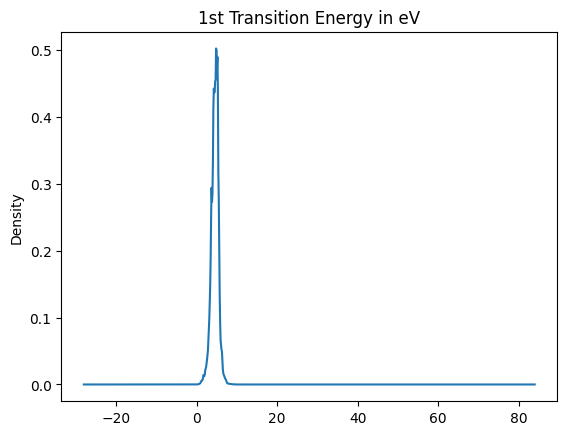

In [16]:
df['TD_ET_00'].plot.density(title='1st Transition Energy in eV')

In [20]:
#Filtering energies
df = df[(df['TD_ET_00']>=0) & (df['TD_ET_00']<=10)]

## Outliers

<Axes: >

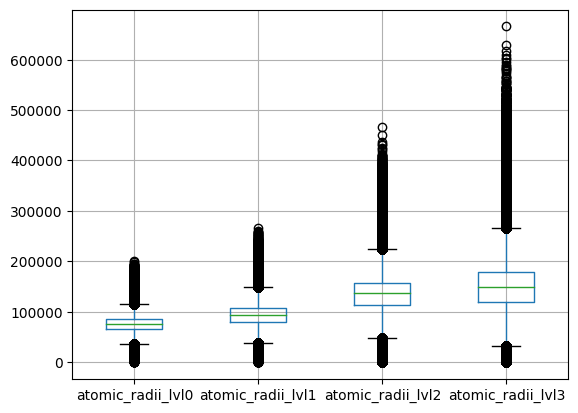

In [26]:
df.iloc[:,1:5].boxplot()

<Axes: >

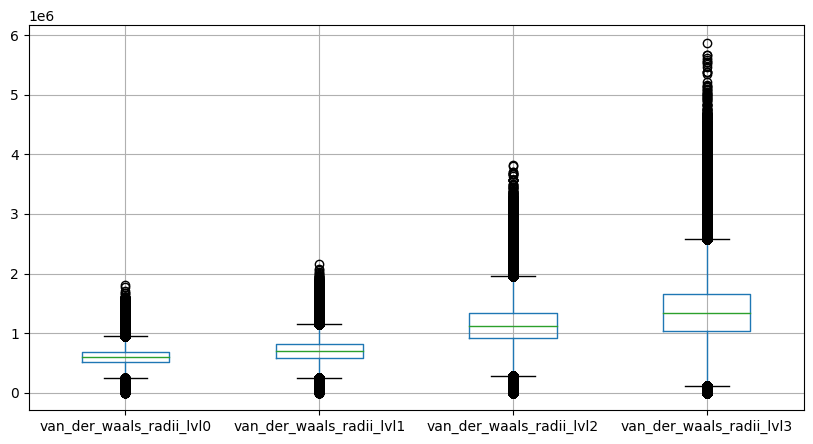

In [32]:
df.iloc[:,5:9].boxplot(figsize=(10,5))

<Axes: >

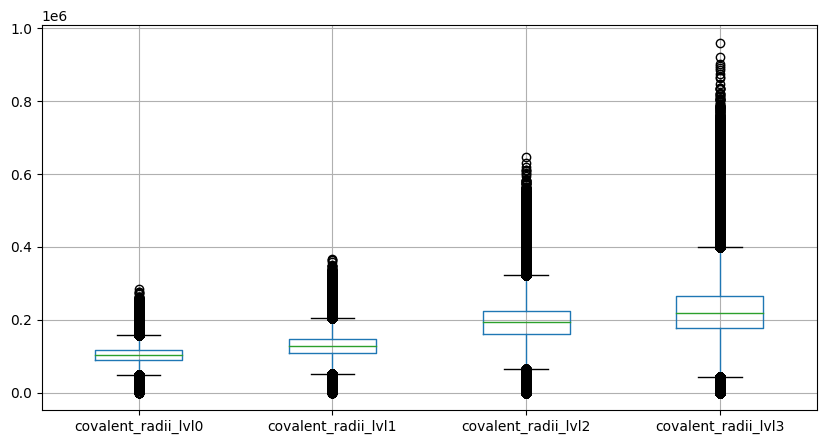

In [33]:
df.iloc[:,9:13].boxplot(figsize=(10,5))

<Axes: >

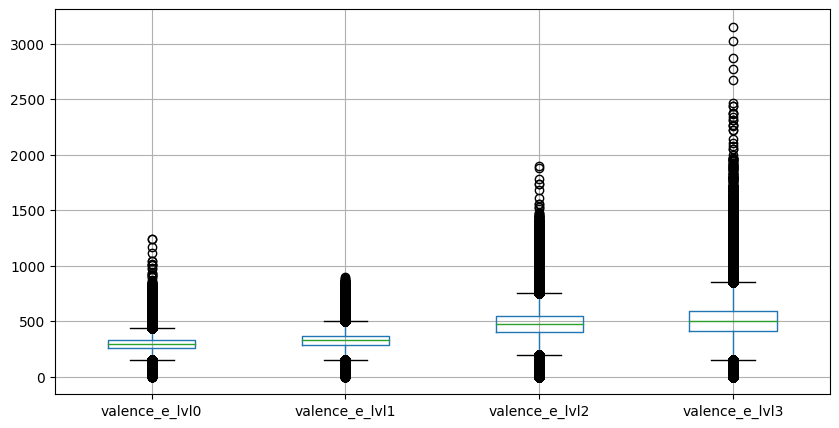

In [34]:
df.iloc[:,13:17].boxplot(figsize=(10,5))

<Axes: >

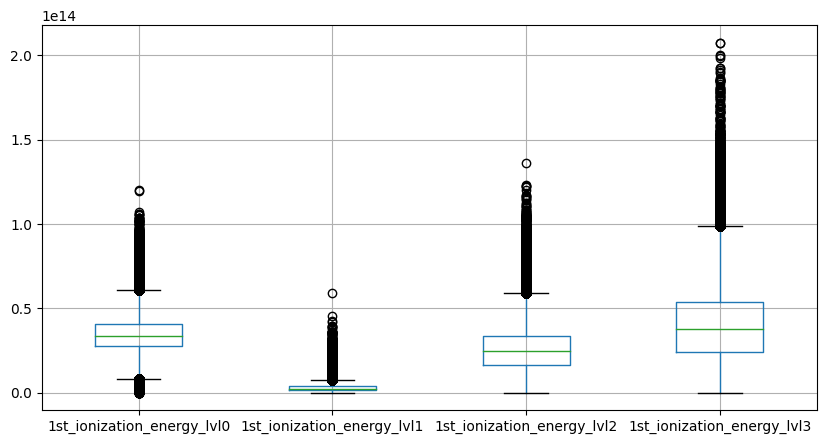

In [35]:
df.iloc[:,17:21].boxplot(figsize=(10,5))

<Axes: >

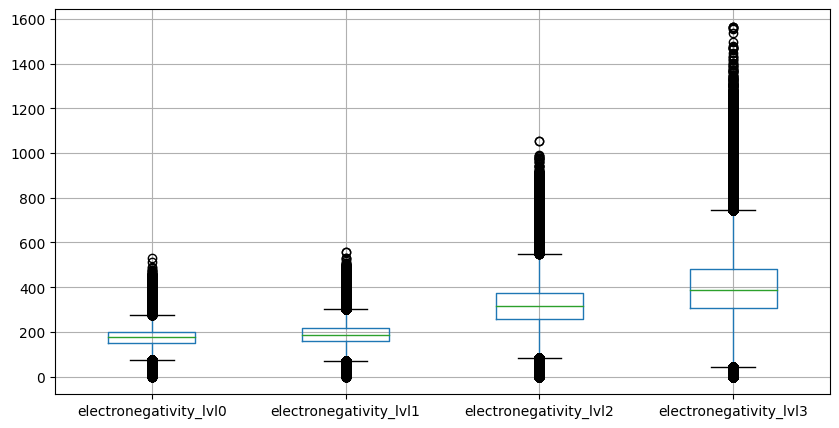

In [36]:
df.iloc[:,21:25].boxplot(figsize=(10,5))

<Axes: >

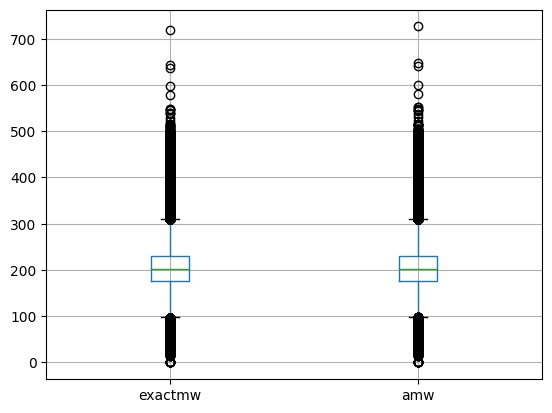

In [40]:
df.iloc[:,25:27].boxplot()

<Axes: >

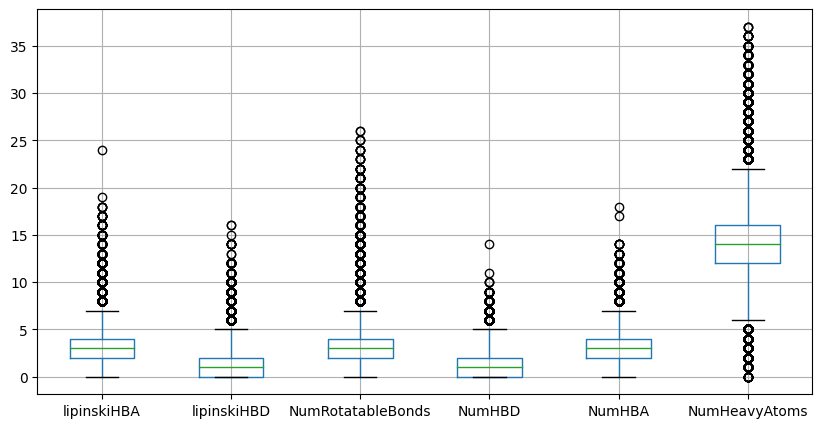

In [39]:
df.iloc[:,27:33].boxplot(figsize=(10,5))

<Axes: >

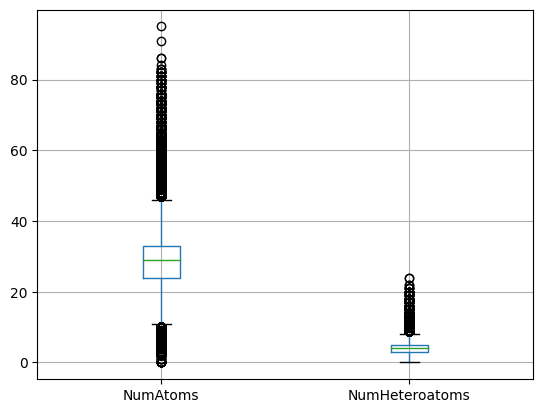

In [45]:
df.iloc[:,33:35].boxplot()

<Axes: >

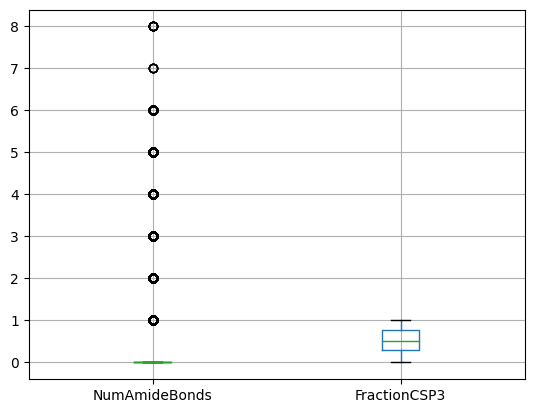

In [44]:
df.iloc[:,35:37].boxplot()

<Axes: >

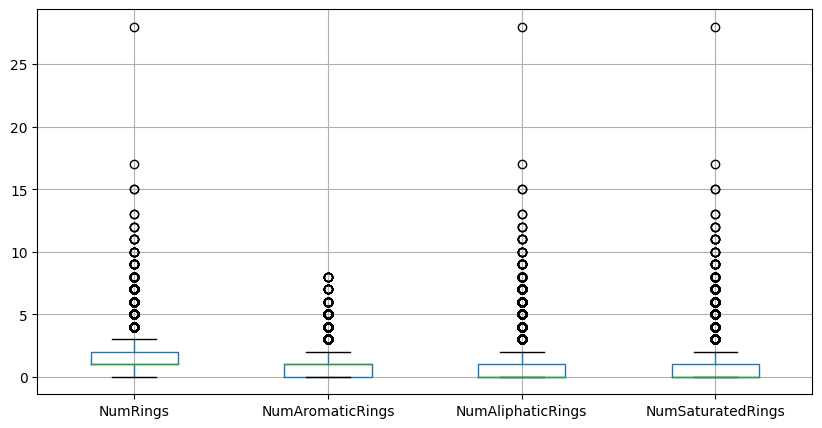

In [42]:
df.iloc[:,37:41].boxplot(figsize=(10,5))

<Axes: >

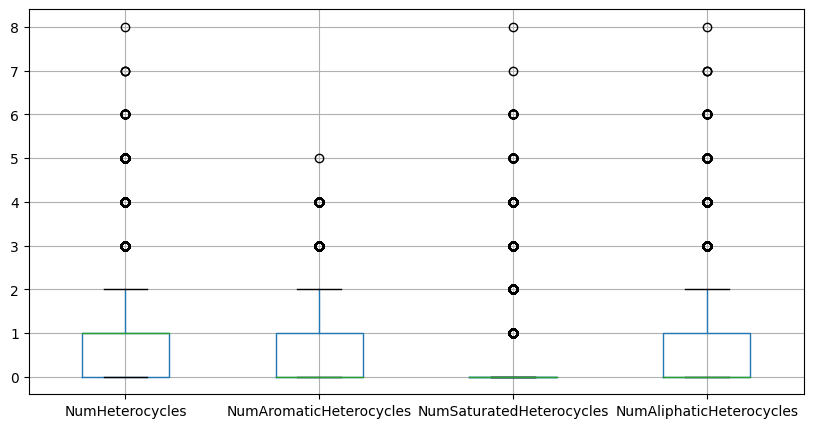

In [43]:
df.iloc[:,41:45].boxplot(figsize=(10,5))

<Axes: >

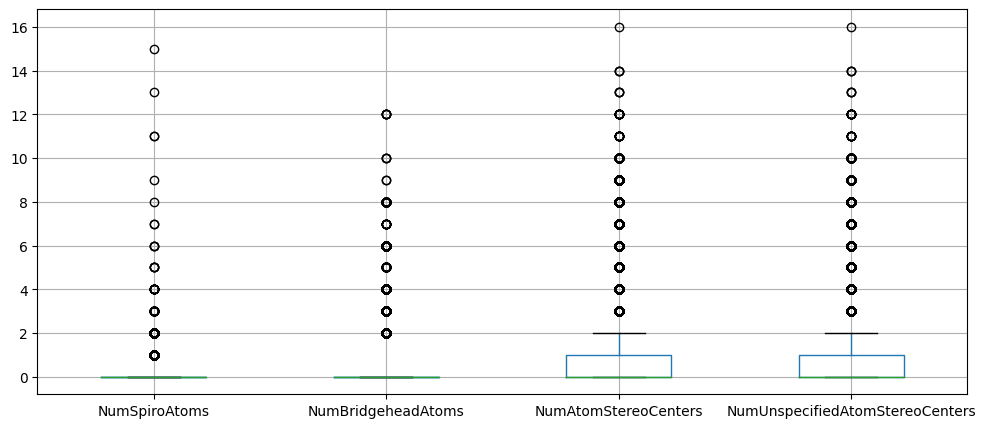

In [47]:
df.iloc[:,45:49].boxplot(figsize=(12,5))

<Axes: >

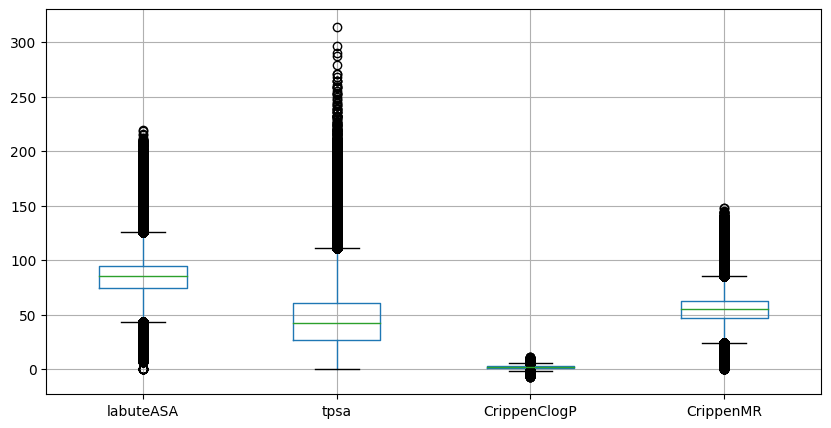

In [48]:
df.iloc[:,49:53].boxplot(figsize=(10,5))

<Axes: >

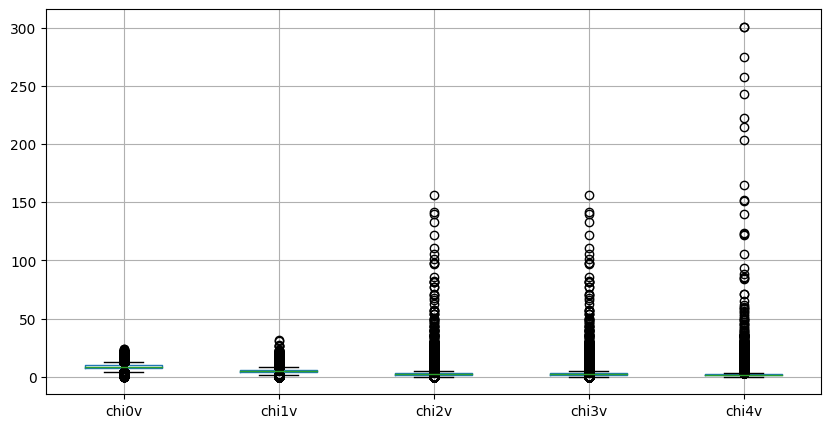

In [51]:
df.iloc[:,53:58].boxplot(figsize=(10,5))

<Axes: >

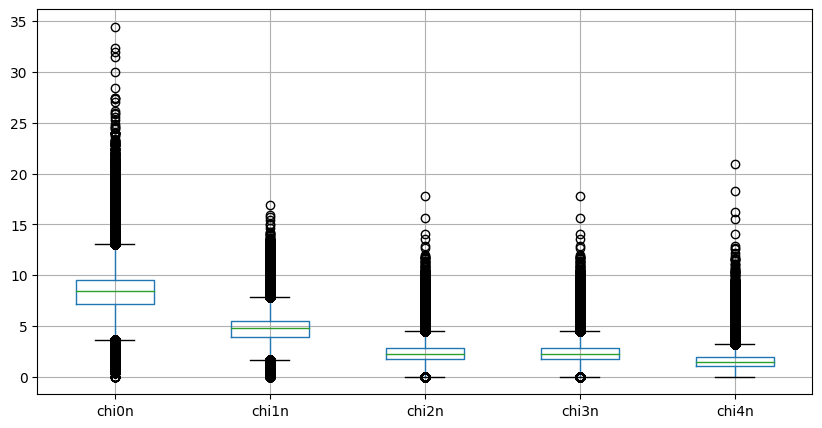

In [55]:
df.iloc[:,58:63].boxplot(figsize=(10,5))

<Axes: >

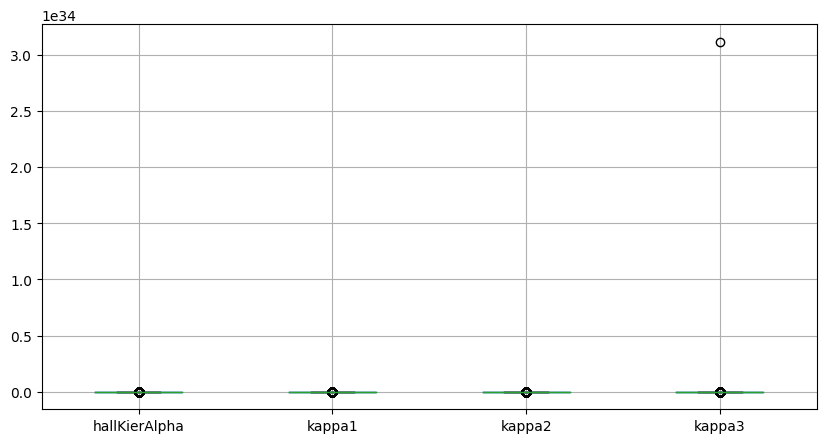

In [54]:
df.iloc[:,63:67].boxplot(figsize=(10,5))

<Axes: >

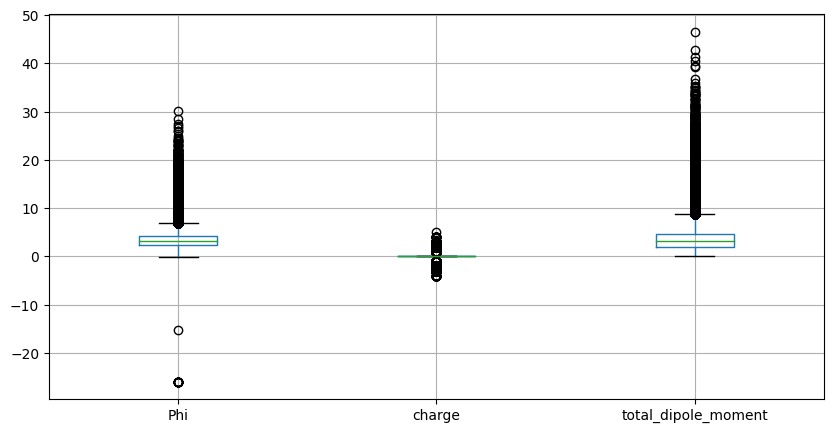

In [56]:
df.iloc[:,67:71].boxplot(figsize=(10,5))

<Axes: >

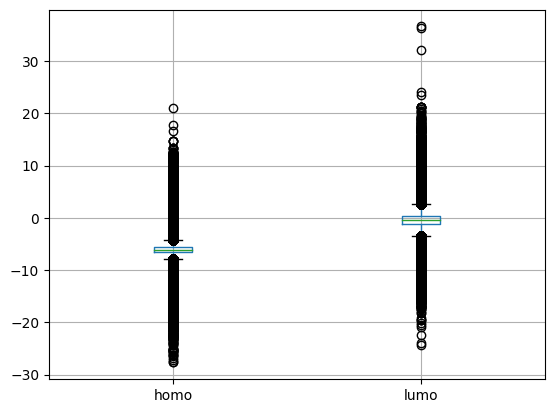

In [83]:
df.iloc[:,72:74].boxplot()

<Axes: >

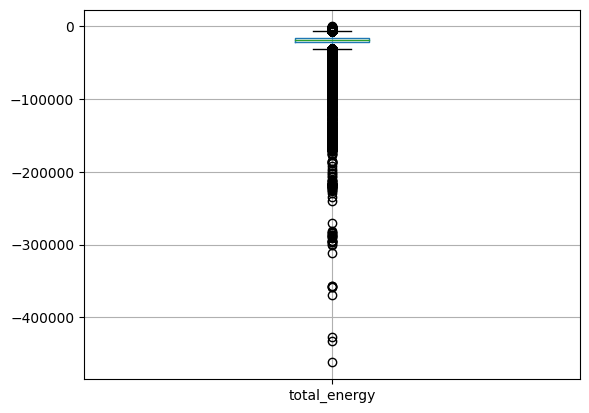

In [85]:
df.iloc[:,75:76].boxplot()

<Axes: >

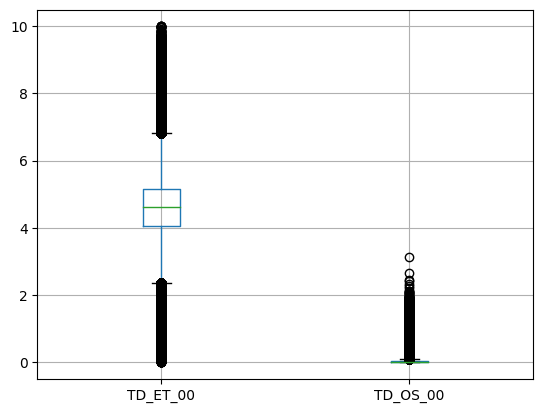

In [87]:
df.iloc[:,76:78].boxplot()

<Axes: >

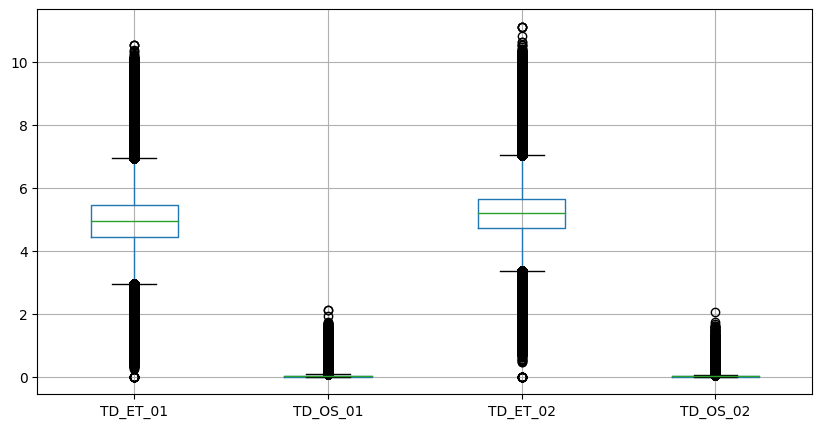

In [60]:
df.iloc[:,78:82].boxplot(figsize=(10,5))

<Axes: >

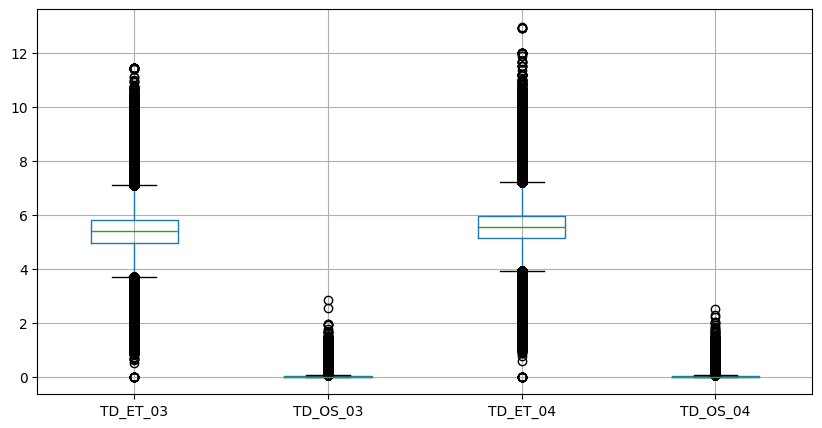

In [64]:
df.iloc[:,82:86].boxplot(figsize=(10,5))

<Axes: >

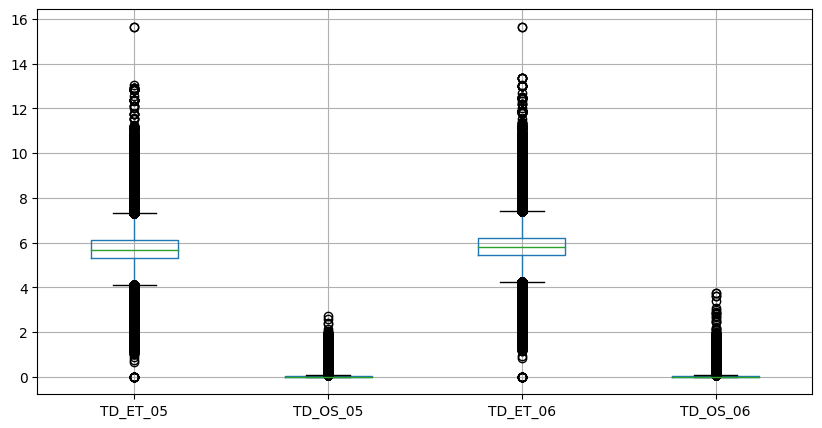

In [65]:
df.iloc[:,86:90].boxplot(figsize=(10,5))

<Axes: >

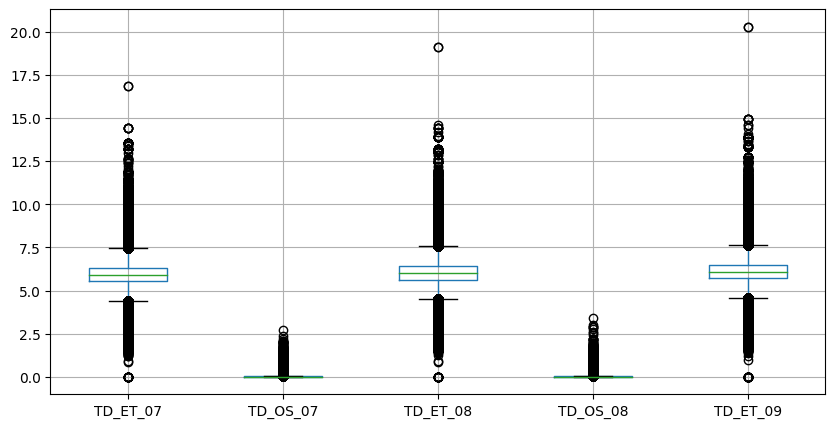

In [67]:
df.iloc[:,90:95].boxplot(figsize=(10,5))

## Saving

In [21]:
df.to_parquet("../Datasets/df_kulik_rdkit_processed.parquet")